In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('NetflixOriginals.csv', encoding = 'ISO-8859-1')


1.Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur?
Görselleştirme yapınız.


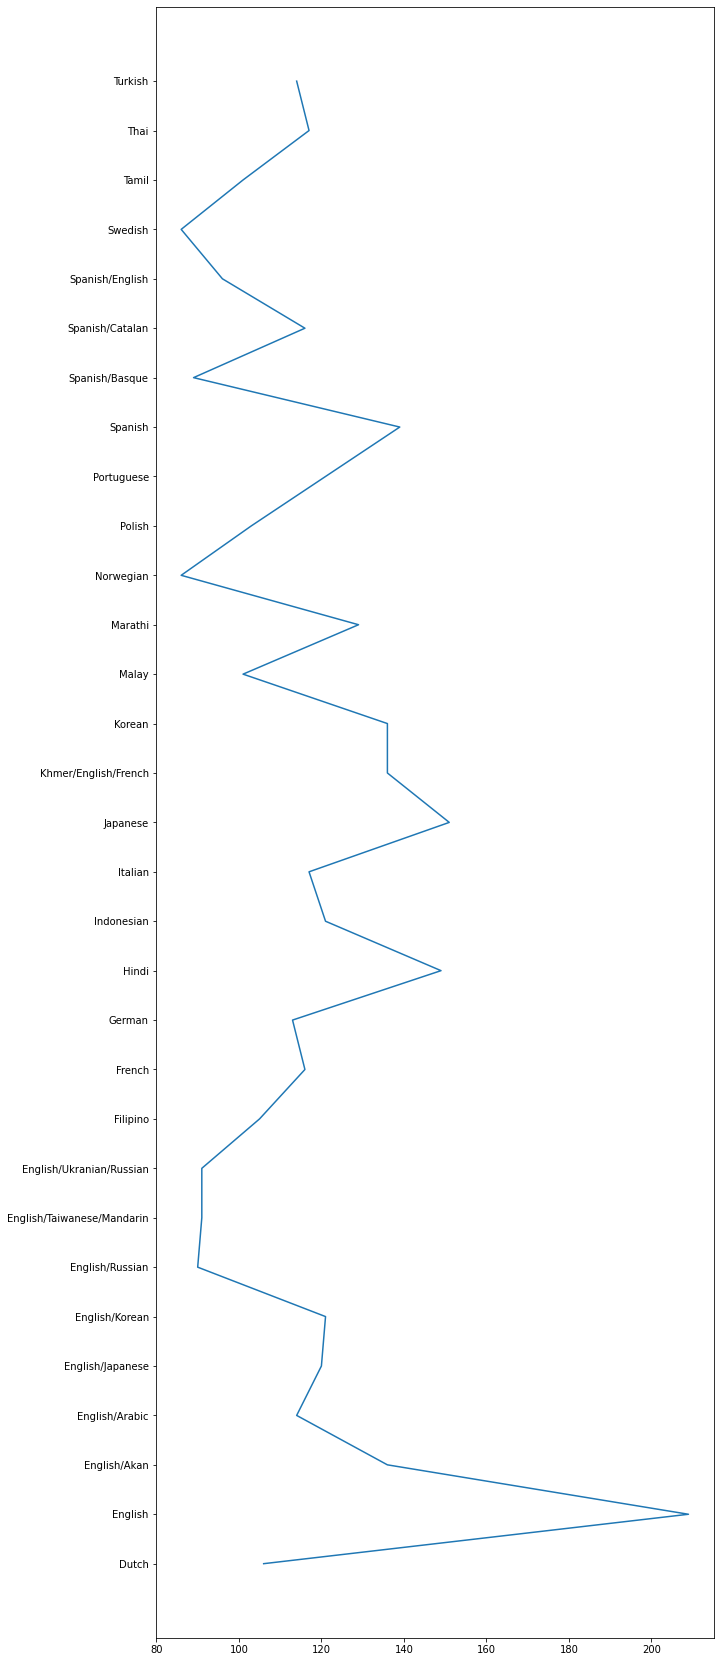

In [ ]:
#data['Premiere']= pd.to_datetime(data['Premiere'])
specialkl=data.drop(["Title","Genre","Premiere","IMDB Score"],axis=1)
sortedRuntime=data.sort_values('Runtime')  #Runtime değerlerine göre sıralanmış liste
aboveAvg=sortedRuntime[(sortedRuntime.Runtime>80)] #Runtime değeri 80den büyükler için
maxRuntime=aboveAvg.groupby('Language').Runtime.max()
diller=[]

gdp_2016 = pd.Series(maxRuntime)
diller=gdp_2016.index.tolist()                          

f = plt.figure()
f.set_figwidth(10) # En ve boy değerleri girildi
f.set_figheight(30)
plt.plot(maxRuntime,diller)
plt.show()

2.2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş
filmlerin IMDB değerlerini bulup görselleştiriniz

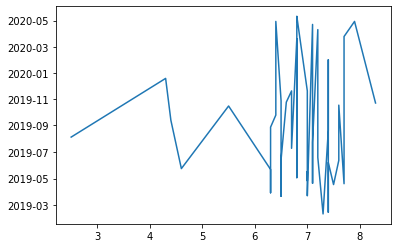

In [ ]:
import datetime
scorelar=[]
dates=[]
d1= datetime.datetime(2019, 1, 30)  #Başlangıç ve bitiş tarihleri verildi       
d2=datetime.datetime(2020, 6, 1)
for i in range(0,580): #Tüm seriyi gezmesi için bir döngü kuruldu.
  if data['Premiere'][i]>d1:  #Çekimi istenne aralıkta olup olmadığı kontrol edildi
    if data['Premiere'][i]<d2:
      if data['Genre'][i].find("Documentary")!=-1: #Tür kontrolü yapıldı
        scorelar.append(kl['IMDB Score'][i]) #Değerler görselleştirme için listlere aktarıldı
        dates.append(kl['Premiere'][i])
plt.plot(scorelar,dates)
plt.show()

3.İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [ ]:
genres=[]
scores=[]
max=0
bestTur=""                                                   
for i in range(0,580): #Tüm liste için uzunluğunca bir döngü kuruldu, dili İngilzice olanların türü ve IMDB skorları listelere atıldı.
 if data["Language"][i].find("English")!=-1:
   genres.append(kl["Genre"][i])
   scores.append(kl["IMDB Score"][i])
for j in range(0,len(scores)): #Skorlar arasında en iyiyi bulmak için bir döngü oluşturuldu
  if scores[j]>max:
    max=scores[j]
    bestTur=data["Genre"][j]
print(max)
print(bestTur)

8.4
Animation / Short


4.'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [ ]:
med=0 #Süreleri tutmak için tanımladım.
toplam=0 # Kaç tane olduğunu saymak için tanımladım.
for i in range(0,len(data)): # Tüm seriyi dönmesi için böyle bir döngü kurdum.
  if data['Language'][i] =='Hindi': #Kontrolü sağladım
    med+=data['Runtime'][i]
    toplam+=1
print("Ortalama 'Runtime' süresi: ", round((med/toplam),2)) #Ekrana yazdırımı yaptım

Ortalama 'Runtime' süresi:  115.79


5.'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir?

In [ ]:
genre=set(data['Genre'])
print("Kategori sayısı: ",len(genre))
print("Kategoriler :",genre)

Kategori sayısı:  115
Kategoriler : {'Coming-of-age comedy-drama', 'Zombie/Heist', 'Musical/Western/Fantasy', 'Anthology/Dark comedy', 'Drama-Comedy', 'Action-adventure', 'Variety show', 'Action thriller', 'Drama/Horror', 'Biographical/Comedy', 'Comedy-drama', 'Musical / Short', 'Action/Comedy', 'Adventure-romance', 'Superhero/Action', 'Horror-thriller', 'Horror comedy', 'Action', 'Political thriller', 'Dark comedy', 'Family/Christmas musical', 'Teen comedy horror', 'Family/Comedy-drama', 'Anime/Fantasy', 'Anime / Short', 'Action/Science fiction', 'Concert Film', 'Fantasy', 'Musical', 'War', 'Making-of', 'Dance comedy', 'Superhero', 'Variety Show', 'Western', 'Psychological thriller drama', 'One-man show', 'Romance drama', 'Drama / Short', 'Science fiction thriller', 'Action-thriller', 'Teen comedy-drama', 'Romantic teenage drama', 'Action comedy', 'Science fiction/Thriller', 'Science fiction/Action', 'Heist film/Thriller', 'Superhero-Comedy', 'Animated musical comedy', 'Drama', 'Scien

In [ ]:
df=pd.DataFrame(genre)
print(df)

                              0
0    Coming-of-age comedy-drama
1                  Zombie/Heist
2       Musical/Western/Fantasy
3         Anthology/Dark comedy
4                  Drama-Comedy
..                          ...
110       Comedy/Fantasy/Family
111                      Family
112           Mentalism special
113                  War-Comedy
114                Mockumentary

[115 rows x 1 columns]


6.Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [ ]:
languages=set(data['Language']) #Kaç tane dil olduğunu tespit etmek için bir set haline getirdim
language=[] # Kaç tane ve hangi dil olduğunu tutmak için bir dizi tanımladım.
for x in languages: #Gezilecek diller için bir döngü kurdum.
  sira=0 # Kaç kere tekrar ettiğinin sayısını tutmak için bir değişken tanımladım.
  for i in range(0,len(data)): # Tüm veri setini gezmek için bir döngü daha tanımladım
    if x==data['Language'][i]: 
      sira+=1
  language.append([sira,x]) #Dil ve tekrar sayısını bir dizi olarak dizinin içerisine attım.
language.sort() # İlk sırada tekrar sayısı olduğu için ona göre bir sıralama yapıldı ve en çok tekrar edenler sonda yer aldı.
print("En Çok kullanılan ilk dil:", language[len(language)-1][1])
print("En Çok kullanılan ikinci dil:", language[len(language)-2][1])
print("En Çok kullanılan üçüncü dil:", language[len(language)-3][1])

En Çok kullanılan ilk dil: English
En Çok kullanılan ikinci dil: Hindi
En Çok kullanılan üçüncü dil: Spanish


7.IMDB puanı en yüksek 10 Filmi bulunuz.


In [ ]:
data['IMDB Score'].sort_values() #Değerleri sıraladım küçükten büyüğe doğru
lenght=len(data['IMDB Score']) # Score sayısının uzunluğunu kullandım kaç tane film olduğunu bulmak için
for i in range(1,11): # Son on filmi istediğim için bir döngü kullandım
  print("Film Adı: ", i , ". Film", data['Title'][lenght - i]) # Değerlerin yazılmasını sağladım.

Film Adı:  1 . Film David Attenborough: A Life on Our Planet
Film Adı:  2 . Film Emicida: AmarElo - It's All For Yesterday
Film Adı:  3 . Film Springsteen on Broadway
Film Adı:  4 . Film Winter on Fire: Ukraine's Fight for Freedom
Film Adı:  5 . Film Taylor Swift: Reputation Stadium Tour
Film Adı:  6 . Film Ben Platt: Live from Radio City Music Hall
Film Adı:  7 . Film Dancing with the Birds
Film Adı:  8 . Film Cuba and the Cameraman 
Film Adı:  9 . Film The Three Deaths of Marisela Escobedo
Film Adı:  10 . Film Seaspiracy


8.IMDB Puanı ile Runtime arasında nasıl bir korelasyon vardır inceleyip görselleştiriniz.

In [ ]:
#Heatmap kısmı
special=data.drop(["Title","Genre", "Premiere", "Language"],axis=1) #Dataset içerisindeki kullanılmayacakları temizleyip yeni bir veri seti oluşturdum.
special.corr().style.background_gradient(cmap="Blues") #Korelasyon fonksiyonunu kullanarak bir heatmap oluşturulmasını sağladım.

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


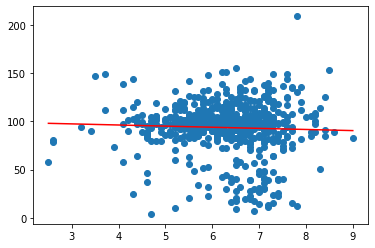

In [ ]:
#Plot Kısmı
x= data['IMDB Score'] 
y=data['Runtime']
correlation = y.corr(x) #Veri setlerini alarak aralarındaki ilişkiyi hazır fonksiyon yardımı ile belirledim.
plt.scatter(x,y) #Noktaların belirlenmesi için bu sonksiyonu kullandım
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red') #Eğri için tanımlamalar yaptım.

9.IMDB Puanı en yüksek ilk 10 "Genre" hangileridir? Görselleştiriniz.


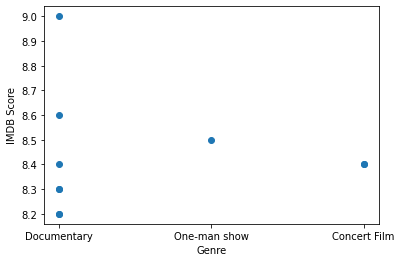

In [ ]:
special = data.drop(["Title","Premiere","Runtime","Language"],axis=1) #Kullanılmayacak değerleri sildiğim bir dizi oluşturdum.
genre=[] # En yüksek on değeri atmak için diziler tanımladım.
score=[] 
special=special.sort_values('IMDB Score',ascending=False)

for i in range(1,11): # Değerleri ekledim.
  genre.append(special['Genre'][len(special)-i])
  score.append(special['IMDB Score'][len(special)-i])

plt.xlabel("Genre") # Başlıkları yazdım.
plt.ylabel("IMDB Score")
plt.scatter(genre,score) # Nokta grafiği olması için scatter fonksiyonunu kullandım.

10.Soru - 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [ ]:
Runtime = data.sort_values("Runtime", ascending=False).head(10) # Runtime değerlerinin azalan sırada sıralandığı ve ilk 10 tanesinin alındığını göstermek için yazıldı
Runtime = Runtime[["Title","Runtime"]] #İsmi ve skor ekrana gelmesi için yazıldı.
print(Runtime)

                               Title  Runtime
561                     The Irishman      209
328                      Da 5 Bloods      155
581          Springsteen on Broadway      153
247                         Citation      151
284               The Forest of Love      151
509                   Raat Akeli Hai      149
7    The Last Days of American Crime      149
543                             Ludo      149
194                 Army of the Dead      148
5                              Drive      147


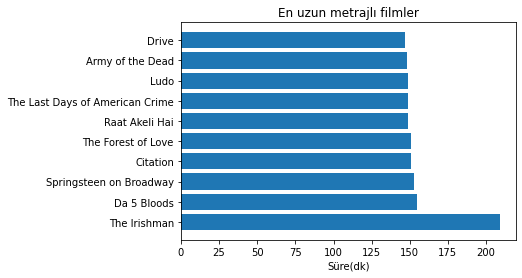

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1) #Grafiğin temeli için yazıldı.
ax1.set_title("En uzun metrajlı filmler")
ax1.set_xlabel("Süre(dk)")
plt.barh(Runtime["Title"],Runtime["Runtime"]) # Çubukların yataya paralel durması için barh fonksiyonu kullanıldı.
plt.show()

11.Soru - Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('NetflixOriginals.csv', encoding = 'ISO-8859-1')
Year = data["Premiere"].str[-4:] #Yılı almak için son -4 değeri kullanıldı
data["Year"] = Year
data["Year"] = data["Year"].astype(str).astype(int)
Movie_count = data["Year"].value_counts() # Değerleri sayması için yazıldı.
df_movie = pd.DataFrame({'Year':Movie_count.index, 'Number':Movie_count.values})

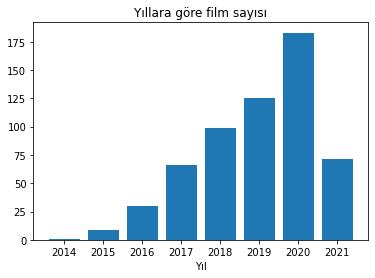

In [ ]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.set_title("Yıllara göre film sayısı")
ax2.set_xlabel("Yıl")
plt.bar(df_movie["Year"],df_movie["Number"]) #Dikey çubuklar için bar fonksiyonu kullanıldı.
plt.show() #Ekrana bastırım yapılması için show fonksiyonu kullanıldı.

12.Soru - Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [ ]:
Language = data.groupby("Language")["IMDB Score"].mean() #Dillere göre gruplanan verilerin IMDB skorlarına ortalamasının bulunması için yazıldı.
Language_order = Language.sort_values().head(10) #Sıralanan değerlerin ilk on tanesinin alımı için yazıldı.
df_language = pd.DataFrame({'Language':Language_order.index, 'Mean_Score':Language_order.values}) #Dataframe olarak bastırım yapılması için yazıldı.

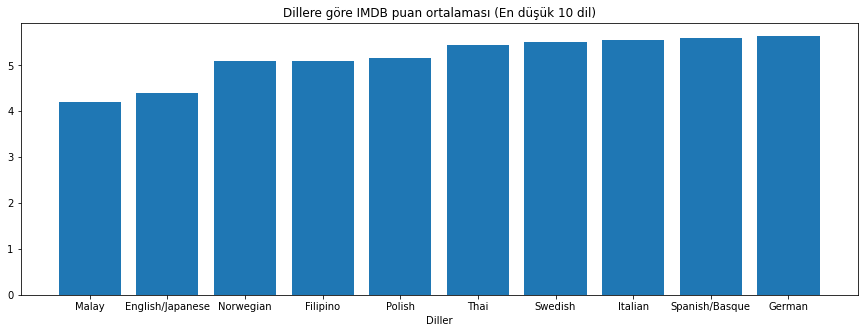

In [ ]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)
ax3.set_title("Dillere göre IMDB puan ortalaması (En düşük 10 dil)")
ax3.set_xlabel("Diller")
fig3.set_figwidth(15)
fig3.set_figheight(5)
plt.bar(df_language["Language"],df_language["Mean_Score"])
plt.show()

13.Hangi yılın toplam "runtime" süresi en fazladır?

In [ ]:
top=0
maxsure=0
maxyil=0
yillar=[2014,2015,2016,2017,2018,2019,2020,2021,2022]
data=pd.read_csv('NetflixOriginals.csv', encoding = 'ISO-8859-1')
data['Premiere']= pd.to_datetime(data['Premiere']) 
for j in range(0,9):
  for i in range(0,580):   
    if data['Premiere'][i].year==yillar[j]:
      top=top+data['Runtime'][i]
  if maxsure<top:
    max=top
    maxyil=yillar[j]
       
     
print(max)       
print(maxyil)   

54233
2022


14.Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [ ]:
top=0     
ty=data.groupby('Language').Genre.max()  #Dillere göre gruplanan verilerin türlerindeki en yüksek değerler için yazıldı.                                        
diller=[]
gdp_2016 = pd.Series(ty)
diller=gdp_2016.index.tolist()  #Listeye çevirim için yazıldı.   
ty

Language
Bengali                                        Documentary
Dutch                                      Romantic comedy
English                                       Zombie/Heist
English/Akan                                     War drama
English/Arabic                                 Documentary
English/Hindi                                  Documentary
English/Japanese                               Documentary
English/Korean                            Action-adventure
English/Mandarin                               Documentary
English/Russian                                Documentary
English/Spanish                                Documentary
English/Swedish                                Documentary
English/Taiwanese/Mandarin                           Drama
English/Ukranian/Russian                       Documentary
Filipino                                          Thriller
French                                            Thriller
Georgian                                       

15.Veri setinde outlier veri var mıdır? Açıklayınız.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


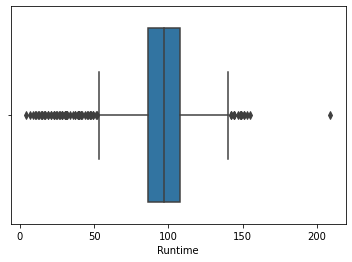

In [ ]:
import seaborn as sns
sns.boxplot(kl['Runtime'])  #150'nin üzerindeki ve 50'nin altındaki değerler outlier'dır.

In [ ]:
import numpy as np
print(np.where(data['Runtime']>150))
print(np.where(data['Runtime']<50))

(array([247, 284, 328, 561, 581]),)
(array([ 15,  30,  33,  40,  66, 111, 133, 152, 197, 199, 244, 263, 278,
       295, 301, 309, 320, 325, 326, 334, 345, 363, 378, 393, 394, 402,
       407, 410, 417, 427, 430, 434, 436, 439, 442, 445, 446, 451, 452,
       453, 457, 459, 471, 473, 485, 496, 498, 501, 506, 513, 521, 522,
       524, 528, 529, 541, 552, 560]),)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


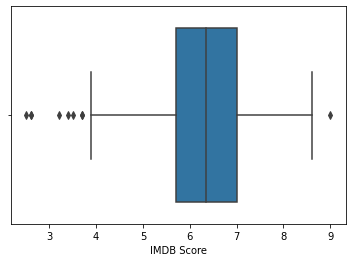

In [ ]:
import seaborn as sns                                        #9'un üstündeki ve 4'ün altındaki  değerler outlierdır.
sns.boxplot(data['IMDB Score'])   

In [ ]:
print(np.where(kl['IMDB Score']>8.5))
print(np.where(kl['IMDB Score']<4))

(array([582, 583]),)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),)
